In [2]:
using Revise
using RDDIP
using Random
using Plots
using Gurobi
using Statistics
const GRB_ENV = Gurobi.Env()
optimizer=() -> Gurobi.Optimizer(GRB_ENV)

Set parameter Username
Set parameter LicenseID to value 2658456
Academic license - for non-commercial use only - expires 2026-04-28


#13 (generic function with 1 method)

In [3]:
# instance=RDDIP.parse_nc4("Data/T-Ramp/10_0_1_w.nc4",  optimizer, 24); instance.N
instance=RDDIP.parse_IEEE_JEAS("6bus_JEAS",  optimizer; NumWind=3); instance.N 
# instance=RDDIP.parse_IEEE_JEAS("118_syst_JEAS",  optimizer; NumWind=91); instance.N 
instance.Demandbus

6-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [35.038000000000004, 33.03, 31.733999999999998, 30.945999999999998, 31.012, 32.096, 34.678, 35.52, 37.362, 41.392  …  49.772000000000006, 51.158, 51.2, 49.348000000000006, 49.194, 47.47, 47.462, 46.534, 39.18600000000001, 39.120000000000005]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [70.07600000000001, 66.06, 63.467999999999996, 61.891999999999996, 62.024, 64.192, 69.356, 71.04, 74.724, 82.784  …  99.54400000000001, 102.316, 102.4, 98.69600000000001, 98.388, 94.94, 94.924, 93.068, 78.37200000000001, 78.24000000000001]
 [70.07600000000001, 66.06, 63.467999999999996, 61.891999999999996, 62.024, 64.192, 69.356, 71.04, 74.724, 82.784  …  99.54400000000001, 102.316, 102.4, 98.6960000000

In [ ]:
res=RDDIP.bin_extensive_neutral_integer(instance; K=8, silent=false, gap=0.0001, timelimit=10);

In [ ]:
# res[2][1,:,1,:]
sum(res[end-2])
[sum(res[end][end-k:end]) for k in 0:20]
# res[end-2]
sum(res[7])+sum(res[5])+ sum(res[8]), sum(instance.Demandbus[b][t] for b in 1:6, t in 1:24)
res[7][:, 10]
instance.Thermalunits[3].MinPower

In [4]:
T = 24
graph=RDDIP.LinearGraph(T);

In [5]:
force = 1.0
UB = sum([max(RDDIP.SHEDDING_COST, RDDIP.CURTAILEMENT_COST)*sum(instance.Demandbus[b][t] for b in 1:size(instance.Next)[1]) for t in 1:T])
lipschitz_constant = maximum([max(RDDIP.SHEDDING_COST, RDDIP.CURTAILEMENT_COST)*sum(instance.Demandbus[b][t] for b in 1:size(instance.Next)[1]) for t in 1:T])
model = RDDIP.PolicyGraph(
    RDDIP.subproblem_builder_UC,
    instance,
    force,
    graph,
    sense = :Min,
    lipschitz_constant = lipschitz_constant,
    lower_bound = 0.0,
    upper_bound = UB,
    optimizer = optimizer,
)

A policy graph with 24 nodes.
 Node indices: 1, ..., 24


In [10]:
RDDIP.train(model; iteration_limit = 1, duality_handler = RDDIP.SB_ConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Lagrangian)

-------------------------------------------------------------------
         RDDIP.jl (c) Oscar Dowson and contributors, 2017-25
-------------------------------------------------------------------
problem
  nodes           : 24
  state variables : 27
  scenarios       : 8.86294e+21
  existing cuts   : false
options
  solver          : serial mode
  risk measure    : RDDIP.Expectation()
  sampling scheme : RDDIP.RobustMonteCarlo
subproblem structure
  VariableRef                             : [102, 110]
  AffExpr in MOI.EqualTo{Float64}         : [35, 35]
  AffExpr in MOI.GreaterThan{Float64}     : [16, 43]
  AffExpr in MOI.LessThan{Float64}        : [28, 55]
  VariableRef in MOI.GreaterThan{Float64} : [22, 22]
  VariableRef in MOI.LessThan{Float64}    : [1, 1]
  VariableRef in MOI.ZeroOne              : [34, 42]
numerical stability report
  matrix range     [4e-01, 2e+02]
  objective range  [1e+00, 3e+02]
  bounds range     [2e+06, 2e+06]
  rhs range        [1e+00, 2e+02]
-------------

RDDIP.TrainingResults(:iteration_limit, RDDIP.Log[RDDIP.Log(1, 3256.3142857142734, 1.8249932857142857e6, 4.6015801429748535, 1, 24, "S", false)])

In [6]:
RDDIP.train(model; iteration_limit = 10, duality_handler = RDDIP.L_ConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Lagrangian)

-------------------------------------------------------------------
         RDDIP.jl (c) Oscar Dowson and contributors, 2017-25
-------------------------------------------------------------------
problem
  nodes           : 24
  state variables : 27
  scenarios       : 8.86294e+21
  existing cuts   : false
options
  solver          : serial mode
  risk measure    : RDDIP.Expectation()
  sampling scheme : RDDIP.RobustMonteCarlo
subproblem structure
  VariableRef                             : [102, 110]
  AffExpr in MOI.EqualTo{Float64}         : [35, 35]
  AffExpr in MOI.GreaterThan{Float64}     : [16, 43]
  AffExpr in MOI.LessThan{Float64}        : [28, 55]
  VariableRef in MOI.GreaterThan{Float64} : [22, 22]
  VariableRef in MOI.LessThan{Float64}    : [1, 1]
  VariableRef in MOI.ZeroOne              : [34, 42]
numerical stability report
  matrix range     [4e-01, 2e+02]
  objective range  [1e+00, 3e+02]
  bounds range     [2e+06, 2e+06]
  rhs range        [1e+00, 2e+02]
-------------

RDDIP.TrainingResults(:iteration_limit, RDDIP.Log[RDDIP.Log(1, 3256.3142857142734, 1.8249932857142857e6, 4.098721981048584, 1, 24, "L", false), RDDIP.Log(2, 35952.422814105725, 291472.9135162026, 4.844016075134277, 1, 48, "L", false), RDDIP.Log(3, 39410.7338669624, 288722.57332572644, 5.419180154800415, 1, 72, "L", false), RDDIP.Log(4, 49369.22281410572, 236974.87751431018, 6.007122993469238, 1, 96, "L", false), RDDIP.Log(5, 49369.22281410573, 236600.24425830715, 6.5833399295806885, 1, 120, "L", false), RDDIP.Log(6, 49481.19424267703, 236600.24425830707, 7.199717998504639, 1, 144, "L", false), RDDIP.Log(7, 50179.21939067715, 171306.36609976896, 7.8412511348724365, 1, 168, "L", false), RDDIP.Log(8, 51785.43571071823, 171306.36609976896, 8.520918130874634, 1, 192, "L", false), RDDIP.Log(9, 47366.029492829395, 171306.36609976884, 9.204426050186157, 1, 216, "L", false), RDDIP.Log(10, 51988.835710718224, 171306.36609976884, 9.906595945358276, 1, 240, "L", false)])

In [18]:
JuMP.is_binary(model[2].states_upper[Symbol("power_integer[2,1]")].out)
JuMP.is_binary(model[2].uncertainties_upper[Symbol("uncertainty[7]")].var)

true

In [7]:
RDDIP.train(model; iteration_limit = 30, duality_handler = RDDIP.SB_ConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Enumeration)

-------------------------------------------------------------------
         RDDIP.jl (c) Oscar Dowson and contributors, 2017-25
-------------------------------------------------------------------
problem
  nodes           : 24
  state variables : 27
  scenarios       : 8.86294e+21
  existing cuts   : true
options
  solver          : serial mode
  risk measure    : RDDIP.Expectation()
  sampling scheme : RDDIP.RobustMonteCarlo
subproblem structure
  VariableRef                             : [102, 110]
  AffExpr in MOI.EqualTo{Float64}         : [35, 35]
  AffExpr in MOI.GreaterThan{Float64}     : [18, 54]
  AffExpr in MOI.LessThan{Float64}        : [28, 55]
  VariableRef in MOI.EqualTo{Float64}     : [28, 36]
  VariableRef in MOI.GreaterThan{Float64} : [22, 22]
  VariableRef in MOI.LessThan{Float64}    : [1, 1]
  VariableRef in MOI.ZeroOne              : [34, 42]
numerical stability report
  matrix range     [4e-01, 5e+03]
  objective range  [1e+00, 3e+02]
  bounds range     [2e+06, 2e

┌ Warning: Re-training a model with existing cuts!
│ 
│ Are you sure you want to do this? The output from this training may be
│ misleading because the policy is already partially trained.
│ 
│ If you meant to train a new policy with different settings, you must
│ build a new model.
│ 
│ If you meant to refine a previously trained policy, turn off this
│ warning by passing `add_to_existing_cuts = true` as a keyword argument
│ to `RDDIP.train`.
│ 
│ In a future release, this warning may turn into an error.
└ @ RDDIP /home/mathis/Documents/RDDIP/src/algorithm.jl:1329


S  8.367655e+04  8.732760e+04  1.497597e+00     14048   1
         2S  8.367655e+04  8.725974e+04  2.947010e+00     14487   1
         3S  8.367655e+04  8.693438e+04  4.335069e+00     14926   1
         4S  8.369587e+04  8.668772e+04  5.768869e+00     15365   1
         5S  8.372700e+04  8.618837e+04  7.190202e+00     15804   1
         6S  8.372700e+04  8.580832e+04  8.598525e+00     16243   1
         7S  8.375452e+04  8.570383e+04  9.950459e+00     16682   1
        11S  8.375452e+04  8.548557e+04  1.553094e+01     18438   1
        15S  8.375452e+04  8.548557e+04  2.109665e+01     20194   1
        19S  8.375452e+04  8.548557e+04  2.673447e+01     21950   1
        23S  8.375452e+04  8.548557e+04  3.253052e+01     23706   1
        27S  8.375452e+04  8.548557e+04  3.837256e+01     25462   1


RDDIP.TrainingResults(:iteration_limit, RDDIP.Log[RDDIP.Log(1, 83676.55479124379, 87327.60394457141, 1.4975969791412354, 1, 14048, "S", false), RDDIP.Log(2, 83676.55479124379, 87259.739248, 2.947010040283203, 1, 14487, "S", false), RDDIP.Log(3, 83676.55479124379, 86934.38253557138, 4.335068941116333, 1, 14926, "S", false), RDDIP.Log(4, 83695.86615199318, 86687.71718534283, 5.768868923187256, 1, 15365, "S", false), RDDIP.Log(5, 83726.99891748822, 86188.36951677127, 7.190201997756958, 1, 15804, "S", false), RDDIP.Log(6, 83726.99891748824, 85808.31778590602, 8.598525047302246, 1, 16243, "S", false), RDDIP.Log(7, 83754.52181568823, 85703.82581447747, 9.950459003448486, 1, 16682, "S", false), RDDIP.Log(8, 83754.52181568823, 85507.00034774281, 11.354351997375488, 1, 17121, "S", false), RDDIP.Log(9, 83754.52181568823, 85507.00034774281, 12.770009994506836, 1, 17560, "S", false), RDDIP.Log(10, 83754.52181568823, 85485.57177631425, 14.172916889190674, 1, 17999, "S", false)  …  RDDIP.Log(21, 837

In [ ]:
# RDDIP.train(model; iteration_limit = 10, duality_handler = RDDIP.StrengthenedConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Lagrangian)
RDDIP.train(model; iteration_limit = 10, duality_handler = RDDIP.LagrangianConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo(), worstcase_strategy = RDDIP.Lagrangian)

In [ ]:
# model[23].bellman_function.global_theta.cuts
# node.upper_bellman_function.global_theta.vertices
# vertex = node.upper_bellman_function.global_theta.vertices[1]
# for (name, value) in vertex.state
#     if value >1e-5
#         println(name, " => ", value)
#     end
# end

model[24].lagrangian_upper.uncertainty

In [ ]:
model[23].bellman_function.global_theta.cuts
node = model[23]
node.upper_bellman_function.global_theta.vertices

In [ ]:
node = model[23]
vertex = node.upper_bellman_function.global_theta.vertices[1]
for (name, value) in vertex.state
    if value >1e-5
        println(name, " => ", value)
    end
end
# RDDIP.compute_lower_bellman_value(
#         node.bellman_function,
#         vertex.state,
#     )
# V = node.bellman_function.global_theta
# state = vertex.state
# value = [cut.intercept + sum(cut.coefficients[i] * state[i] for (i, x) in V.states) for cut in V.cuts]

In [ ]:
RDDIP.train(model; iteration_limit = 10, duality_handler = RDDIP.LagrangianConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo())

In [ ]:
# Random.seed!(12345)
RDDIP.train(model; iteration_limit = 50, duality_handler = RDDIP.LagrangianDuality(), sampling_scheme = RDDIP.RobustMonteCarlo())
# RDDIP.train(model; iteration_limit = 1, duality_handler = RDDIP.LagrangianConicDuality(), sampling_scheme = RDDIP.RobustMonteCarlo())

# RDDIP.train(model; iteration_limit = 1, duality_handler = RDDIP.LagrangianConicDuality())

In [ ]:
Random.seed!(12345)
RDDIP.train(model; iteration_limit = 100, duality_handler = RDDIP.StrengthenedConicDuality())
# RDDIP.train(model; iteration_limit = 1, duality_handler = RDDIP.LagrangianConicDuality())

In [ ]:
using JuMP

model = Model()
@variable(model, x >= 0)
@variable(model, y >= 0)
@constraint(model, c1, x + y <= 10)
cstr = @constraint(model, c2, 2x - y >= 3)


# cons = all_constraints(model; include_variable_in_set_constraints=true)
# println(cons)

f = JuMP.constraint_object(cstr).func

f.terms
s = JuMP.constraint_object(cstr).set

if s isa MOI.GreaterThan
    println("C’est une contrainte de type ≥ avec borne = ", s.lower)
elseif s isa MOI.LessThan
    println("C’est une contrainte de type ≤ avec borne = ", s.upper)
elseif s isa MOI.EqualTo
    println("C’est une contrainte de type = avec borne = ", s.value)
else
    println("Autre type de contrainte")
end
for (i,k) in f.terms
    println((i,k))
end
# typeof(JuMP.name(x))

In [ ]:
RDDIP.TrainingResults(:iteration_limit, RDDIP.Log[RDDIP.Log(1, 1.428402521661652e6, 1.8350314844269806e6, 3.765532970428467, 1, 140, "S", false), RDDIP.Log(2, 1.4869460945114475e6, 1.9150885666642494e6, 9.079401969909668, 1, 280, "S", false)])

In [ ]:
res=RDDIP.train(model; iteration_limit = 2, print_level = 0, duality_handler = RDDIP.RDDIP.LagrangianConicDuality())

In [ ]:
# string([res.log[i].simulation_value for i in 1:length(res.log)])
1.8574247832686587e6

In [ ]:
println(model[23].subproblem)

In [ ]:
# Création du modèle
model = Model(optimizer)

@variable(model, x >= 0)
@variable(model, y >= 0)
@objective(model, Max, 3x + 5y)
@constraint(model, 2x + 3y <= 12)

optimize!(model)
Dict(name(v) => value(v) for v in all_variables(model))


In [ ]:
println(model[23].subproblem)
# mod = model[23].subproblem
# optimize!(mod)

In [ ]:
node = model[23]
for (key, state) in node.states
    # println((key, value(state.in), JuMP.is_integer(state.in), JuMP.upper_bound(state.in)))
    println((key, state.out, JuMP.is_binary(state.out), node.incoming_state_bounds[key]))
    # println((key, value(state.in), JuMP.is_integer(state.in)))
    # println(JuMP.upper_bound(state.in))
end
JuMP.upper_bound(collect(values(node.states))[1].in)
# collect(values(node.states))[1].in


In [ ]:
println(model[1].subproblem)

In [ ]:
1.806476027737761e6, 1.8289582420327545e6

In [ ]:
mod = JuMP.Model(optimizer)
@variable(mod, x, Bin)
@variable(mod, y )
@objective(mod, Max, x)
# JuMP.optimize!(mod)
# JuMP.termination_status(mod)
undo_relax = JuMP.relax_integrality(mod)
println(mod)
# undo_relax()
# JuMP.upper_bound(x)
using Dualization
md=dualize(mod)
println(md)

In [ ]:
using Dualization
mod = JuMP.Model(optimizer)
@variable(mod, x)
@variable(mod, y)
@constraint(mod, s,x + y <= 10)
@objective(mod, Min, x)

new_model, reference_map = copy_model(mod)
@constraint(new_model, fix_x, reference_map[x] == 1.0)
println(new_model)

md=dualize(new_model; dual_names = DualNames("dual_var_", "dual_con_"))
# println(md)
# reference_map[s]
hexpr = JuMP.objective_function(md)
println(md)
@variable(md, z)
@constraint(md, z <= hexpr)
@objective(md, Max, z)
println(md)
md[Symbol("dual_var_", "s")]

In [ ]:
using Suppressor, Dualization
node = model[24]
mod = node.subproblem
undo_relax = JuMP.relax_integrality(mod)
new_model, reference_map = @suppress copy_model(mod)
undo_relax()
copy_state_out = Dict()
copy_state_in = Dict()
copy_uncertainty = Dict()
# for (name,state) in node.states
#     copy_state_out[name] = JuMP.variable_by_name(new_model, string(name,"_out"))
#     copy_state_in[name] = JuMP.variable_by_name(new_model, string(name,"_in"))
# end
# for (name,uncertainty) in node.uncertainties
#     # println(name, uncertainty)
#     copy_uncertainty[name] = JuMP.variable_by_name(new_model, string(name))
# end
# @constraint(new_model, fix_out[name in keys(copy_state_out)], copy_state_out[name] == 1.0)
# @constraint(new_model, fix_in[name in keys(copy_state_in)], copy_state_in[name] == 0.0)
# @constraint(new_model, fix_uncertainty[name in keys(copy_uncertainty)], copy_uncertainty[name] == 0.0)
# println(new_model)
# md=dualize(new_model; consider_constrained_variables=false, dual_names = DualNames("dual_var_", "dual_con_"))
# hexpr = JuMP.objective_function(md)
# @variable(md, θ)
# @constraint(md, θ <= hexpr)
# @objective(md, Max, θ)
# println(md)
# dual_variables_states_out = Dict(name => md[Symbol("dual_var_fix_out[$name]")] for name in keys(copy_state_out))
# dual_variables_states_in = Dict(name => md[Symbol("dual_var_fix_in[$name]")] for name in keys(copy_state_in))
# dual_variables_uncertainty = Dict(name => md[Symbol("dual_var_fix_uncertainty[$name]")] for name in keys(copy_uncertainty))

In [ ]:
lagrangian = model[24].lagrangian
cstr = lagrangian.upper_constraint
var = dual_variables_states_out[Symbol("power_integer[1,1]")]
set_normalized_coefficient(cstr, var, -1)
set_normalized_rhs(cstr, 3)
cstr

In [ ]:
using JuMP, Dualization
model = Model()
@variable(model, x)
@variable(model, y)
@variable(model, z)
@constraint(model, soccon, [x; y; z] in SecondOrderCone())
@constraint(model, eqcon, x == 1)
@objective(model, Min, y + z)
dual_model = dualize(model; consider_constrained_variables=false, dual_names = DualNames("", ""))
println(dual_model)

In [ ]:
new_model

In [ ]:
dualize(new_model)

In [ ]:
using JuMP, Dualization, LinearAlgebra

# Ton modèle original
model = Model()
@variable(model, x1 >= 0)
@variable(model, x2)
@constraint(model, x2 == 4)
@constraint(model, 2x1 - x2 >= 1)
@constraint(model, x1 + x2 <= 3)
@objective(model, Min, x1 + 2x2)

# --- Étape 1 : standardiser ---
# Dualization.jl fournit un utilitaire pour cela :
# standard_model = Dualization.standard_form(model)

# --- Étape 2 : dualiser ---
dual_model = dualize(model)

println("Nb variables primal standardisé: ", num_variables(model))
# println("Nb contraintes dual: ", num_constraints(dual_model))
println(dual_model)

In [ ]:
println(model[2].lagrangian.model)

In [ ]:
mod = model[2].lagrangian.model
# set_optimizer(mod, optimizer)
set_optimizer_attribute(mod, "Presolve", 0)
println(mod)
unset_silent(mod)  # Remet les sorties du solveur
optimize!(mod)
println("Termination status: ", JuMP.termination_status(mod))
println("Primal status:     ", JuMP.primal_status(mod))
Dict(i =>value.(var) for (i, var) in model[2].lagrangian.dual_variables)
for (i, var) in model[2].lagrangian.dual_variables
    if abs(value(var)) > 1e-6
        println("Variable ", i, " has value ", value(var))
    end
end
println(value(model[2].lagrangian.theta))

In [31]:
using XLSX

# Ouvre le fichier Excel
xlsx = XLSX.readxlsx("results_6bus_1000.xlsx")

XLSXFile("results_6bus_1000.xlsx") containing 1 Worksheet
            sheetname size          range        
-------------------------------------------------
              results 7x5           A1:E7        


In [32]:
Lower_bound = Dict()
Upper_bound = Dict()
computation_time = Dict()
for i in 2:7
    name = xlsx["results"]["A$i"]
    A = xlsx["results"]["C$i"]
    B = parse.(Float64, split(strip(A, ['[', ']']), ","))
    C = xlsx["results"]["E$i"]
    Lower_bound[name] = B
    computation_time[name] = parse.(Float64, split(strip(C, ['[', ']']), ","))
    A = xlsx["results"]["D$i"]
    B = parse.(Float64, split(strip(A, ['[', ']']), ","))
    Upper_bound[name] = B
end

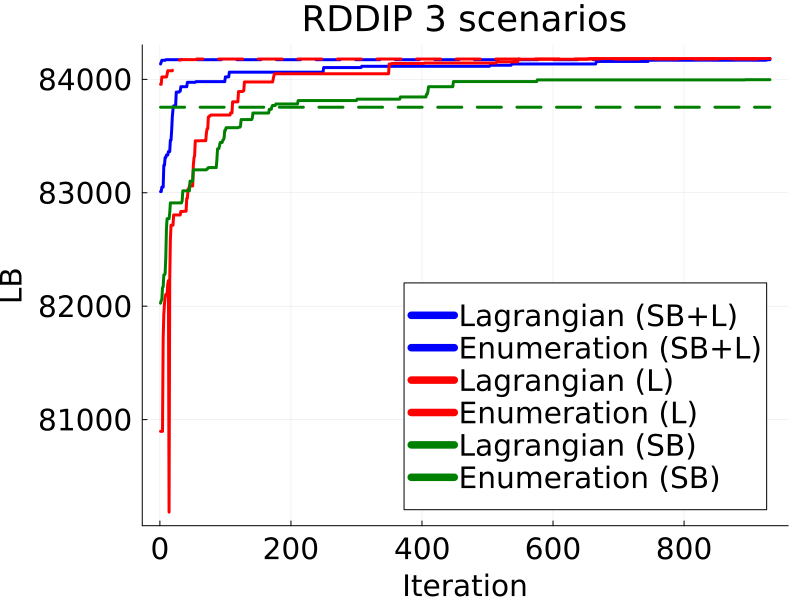

In [35]:
using Plots
K=50
N=1000
p = plot(title="RDDIP 3 scenarios",
     xlabel="Iteration",
     ylabel="LB",
     legend=:bottomright,
    titlefontsize=24, 
    guidefontsize=20, 
    tickfontsize=20, 
    legendfontsize=20,
    size=(800, 600),
    linewidth=3, )

# Build a color map based on parenthesis groups (e.g., (SB)) so all methods with the same parentheses share a color
color_palette = [:blue, :red, :green, :orange, :purple, :cyan, :magenta, :brown, :black]
color_map = Dict{String,Symbol}()
color_keys = String[]  # keep insertion order of groups
color_idx = 1

function key_of_name(nom)
    m = match(r"\((.*?)\)", nom)
    return m !== nothing ? m.captures[1] : nom
end

# Collect all series first so we can control plotting (and legend) order
series = Any[]
for (nom, valeurs) in Lower_bound
    key = key_of_name(nom)
    if !haskey(color_map, key)
        color_map[key] = color_palette[color_idx]
        push!(color_keys, key)
        color_idx = color_idx == length(color_palette) ? 1 : color_idx + 1
    end
    # choose linestyle: Enumeration -> dashed, Lagrangian -> solid, default solid
    lname = lowercase(nom)
    linestyle = :solid
    if occursin("enumeration", lname)
        linestyle = :dash
    elseif occursin("lagrang", lname) || occursin("lagrangian", lname)
        linestyle = :solid
    end
    x = 1:length(valeurs[K:N-20])
    y = valeurs[K:N-20]
    push!(series, Dict(:nom=>nom, :x=>x, :y=>y, :linestyle=>linestyle, :color=>color_map[key], :group_key=>key))
end

# Now order series by color (in the order color_keys) and within each color put Lagrangian first then Enumeration then others
ordered_series = Any[]
for g in color_keys
    group = filter(s->s[:group_key] == g, series)
    sort!(group, by = s->(occursin("lagrang", lowercase(s[:nom])) ? 0 : occursin("enumeration", lowercase(s[:nom])) ? 1 : 2))
    append!(ordered_series, group)
end

for s in ordered_series
    plot!(s[:x], s[:y], label=s[:nom], linewidth=3, linestyle=s[:linestyle], color=s[:color])
end

display(p)

In [ ]:
Lower_bound["SB_Enumeration"][1:end]

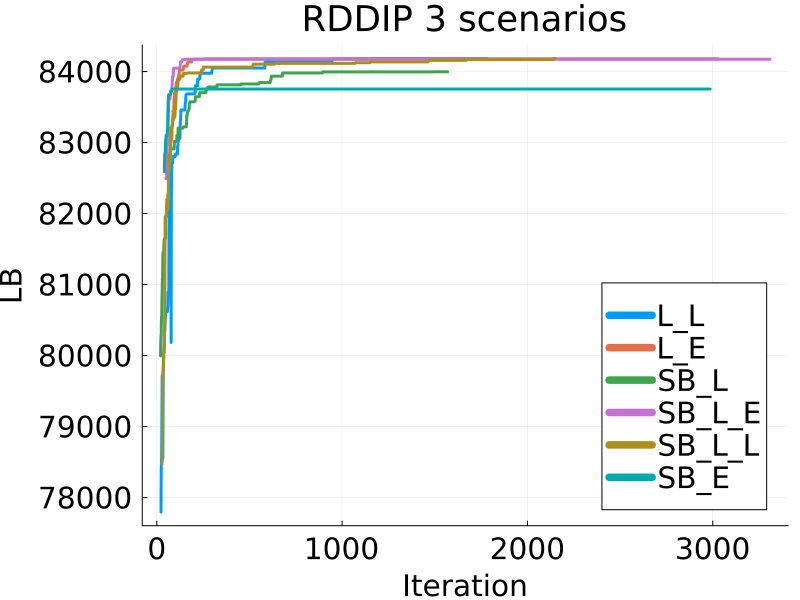

In [ ]:
using Plots
K=20
N=1000
p = plot(title="RDDIP 3 scenarios",
     xlabel="Computation time",
     ylabel="LB",
     legend=:bottomright,
    titlefontsize=24, 
    guidefontsize=20, 
    tickfontsize=20, 
    legendfontsize=20,
    size=(800, 600),
    linewidth=3, )

# Reuse same color grouping logic so methods with same parentheses keep the same color
color_palette = [:blue, :red, :green, :orange, :purple, :cyan, :magenta, :brown, :black]
color_map = Dict{String,Symbol}()
color_keys = String[]  # keep insertion order of groups
color_idx = 1

function key_of_name(nom)
    m = match(r"\((.*?)\)", nom)
    return m !== nothing ? m.captures[1] : nom
end

# Collect series so we can control plotting/legend order
series = Any[]
for (nom, valeurs) in Lower_bound
    key = key_of_name(nom)
    if !haskey(color_map, key)
        color_map[key] = color_palette[color_idx]
        push!(color_keys, key)
        color_idx = color_idx == length(color_palette) ? 1 : color_idx + 1
    end
    lname = lowercase(nom)
    linestyle = :solid
    if occursin("enumeration", lname)
        linestyle = :dash
    elseif occursin("lagrang", lname) || occursin("lagrangian", lname)
        linestyle = :solid
    end
    x = computation_time[nom][K:N-20]
    y = valeurs[K:N-20]
    push!(series, Dict(:nom=>nom, :x=>x, :y=>y, :linestyle=>linestyle, :color=>color_map[key], :group_key=>key))
end

ordered_series = Any[]
for g in color_keys
    group = filter(s->s[:group_key] == g, series)
    sort!(group, by = s->(occursin("lagrang", lowercase(s[:nom])) ? 0 : occursin("enumeration", lowercase(s[:nom])) ? 1 : 2))
    append!(ordered_series, group)
end

for s in ordered_series
    plot!(s[:x], s[:y], label=s[:nom], linewidth=3, linestyle=s[:linestyle], color=s[:color])
end

display(p)

In [ ]:
import Pkg

In [ ]:
Pkg.